# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data
table = soup.find('table') #locate the table in HTML 
rows = table.find_all('tr')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
mars_weather_data = []

# Loop through the scraped data
for row in rows[1:]:  # Skip the first row (headers)
    cols = row.find_all('td')  # Extract all columns from the row
    
    # Extract text safely and store as a list of strings
    row_data = [col.get_text(strip=True) for col in cols]  
    
    # Append only non-empty rows
    if len(row_data) == 7:  # Ensure each row has exactly 7 elements
        mars_weather_data.append(row_data)

# Convert the cleaned data into a DataFrame
column_names = ["id", "terrestrial_date", "sol", "ls", "month", "min_temp", "pressure"]
mars_weather_df = pd.DataFrame(mars_weather_data, columns=column_names)


In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
column_names = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
mars_weather_df = pd.DataFrame(mars_weather_data, columns=column_names)

In [8]:
# Confirm DataFrame was created successfully
mars_weather_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
mars_weather_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [10]:
# Change data types for data analysis
# Convert terrestrial_date to datetime
mars_weather_df["terrestrial_date"] = pd.to_datetime(mars_weather_df["terrestrial_date"])

# Convert numerical columns to specified types
mars_weather_df["sol"] = mars_weather_df["sol"].astype("int32")
mars_weather_df["ls"] = mars_weather_df["ls"].astype("int32")
mars_weather_df["month"] = mars_weather_df["month"].astype("int32")
mars_weather_df["min_temp"] = mars_weather_df["min_temp"].astype("float64")
mars_weather_df["pressure"] = mars_weather_df["pressure"].astype("float64")

In [11]:
# Confirm type changes were successful by examining data types again
mars_weather_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?
num_months = mars_weather_df["month"].nunique()
num_months

12

In [13]:
# 2. How many sols (Martian days) worth of data are there?
num_sols = mars_weather_df["sol"].nunique()
num_sols

1867

In [14]:
# 3. What is the average minimum temperature by month?
avg_temp_by_month = mars_weather_df.groupby("month")["min_temp"].mean()
avg_temp_by_month

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

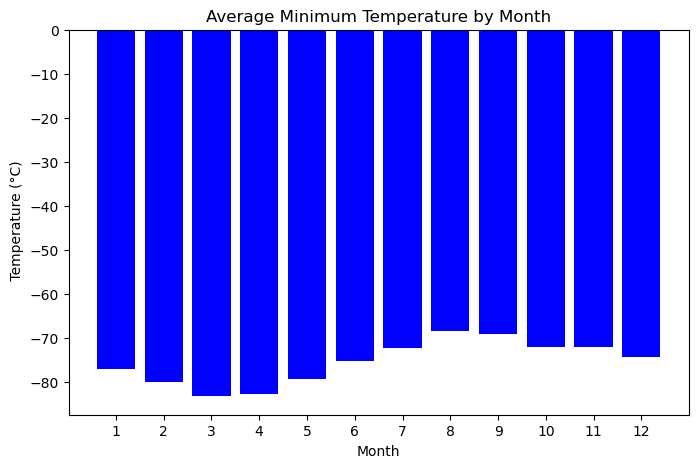

In [15]:
# Plot the average minimum temperature by month
# Sort the average temperature by month for better visualization
avg_temp_by_month_sorted = mars_weather_df.groupby("month")["min_temp"].mean().sort_index()

# Plot bar chart
plt.figure(figsize=(8,5))
plt.bar(avg_temp_by_month_sorted.index, avg_temp_by_month_sorted.values, color="blue")
plt.xlabel("Month")
plt.ylabel(" Temperature (°C)")
plt.title("Average Minimum Temperature by Month")
plt.xticks(range(1, 13))  # Ensure all 12 months are labeled

# Show the plot
plt.show()


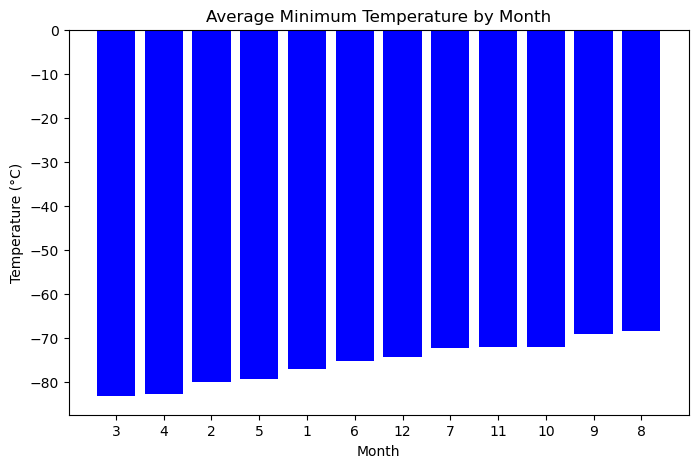

In [16]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
# Define the correct order of months from coldest to warmest based on temperature
sorted_months = [3, 4, 2, 5, 1, 6, 12, 7, 11, 10, 9, 8]

# Group by month and calculate the average minimum temperature
avg_temp_by_month = mars_weather_df.groupby("month")["min_temp"].mean()

# Reorder the data based on the specified order
avg_temp_sorted = avg_temp_by_month.loc[sorted_months]

# Plot bar chart with the coldest months on the left and warmest on the right
plt.figure(figsize=(8,5))
plt.bar(range(1, 13), avg_temp_sorted.values, color="b")  # Use range(1,13) for x-axis order
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.title("Average Minimum Temperature by Month")
plt.xticks(range(1, 13), sorted_months)  # Set x-tick labels to match the sorted order

# Show the plot
plt.show()

In [17]:
# 4. What is the average pressure by month?
avg_pressure_by_month = mars_weather_df.groupby("month")["pressure"].mean()
avg_pressure_by_month

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

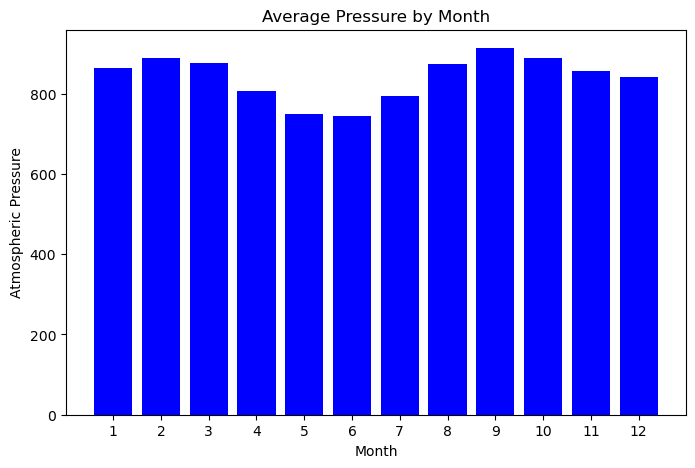

In [18]:
# Plot the average pressure by month
# Sort the average pressure by month for better visualization
avg_pressure_by_month_sorted = mars_weather_df.groupby("month")["pressure"].mean().sort_index()

# Plot bar chart
plt.figure(figsize=(8,5))
plt.bar(avg_pressure_by_month_sorted.index, avg_pressure_by_month_sorted.values, color="b")
plt.xlabel("Month")
plt.ylabel("Atmospheric Pressure")
plt.title("Average Pressure by Month")
plt.xticks(range(1, 13))  # Ensure all 12 months are labeled

# Show the plot
plt.show()

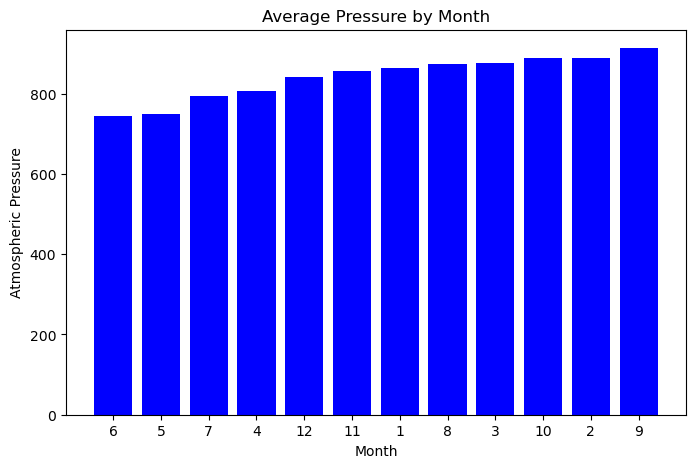

In [19]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
# Define the correct order of months from lowest to highest atmospheric pressure
sorted_pressure_months = [6, 5, 7, 4, 12, 11, 1, 8, 3, 10, 2, 9]

# Group by month and calculate the average atmospheric pressure
avg_pressure_by_month = mars_weather_df.groupby("month")["pressure"].mean()

# Reorder the data based on the specified order
avg_pressure_sorted = avg_pressure_by_month.loc[sorted_pressure_months]

# Plot bar chart with the lowest pressure months on the left and highest on the right
plt.figure(figsize=(8,5))
plt.bar(range(1, 13), avg_pressure_sorted.values, color="b")  # Use range(1,13) for x-axis order
plt.xlabel("Month")
plt.ylabel("Atmospheric Pressure")
plt.title("Average Pressure by Month")
plt.xticks(range(1, 13), sorted_pressure_months)  # Set x-tick labels to match the sorted order

# Show the plot
plt.show()

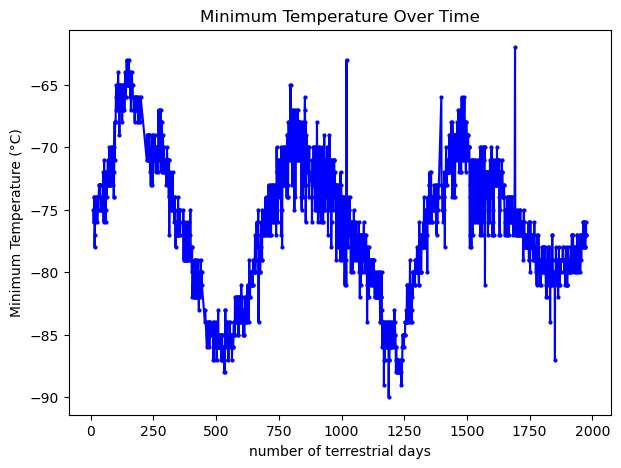

In [20]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
# Plot min_temp over time to estimate Martian year length
plt.figure(figsize=(7,5))
plt.plot(mars_weather_df["sol"], mars_weather_df["min_temp"], marker="o", linestyle="-", markersize=2, color="blue")
plt.xlabel("number of terrestrial days")
plt.ylabel("Minimum Temperature (°C)")
plt.title("Minimum Temperature Over Time")

# Show the plot
plt.show()


#### Minimum Temperature

Due to variation in temperatures by month, we can assume that martian seasons impact temperature, similar to earth, with the codest months around 3-4, and the warmest months around 8-9. We can also note that Mars is extremely cold with even the warmest months staying below -50 degrees celsius.

#### Atmospheric Pressure

Atmospheric pressure follows a seasonal cycle, peaking in Month 9 and hitting the lowest levels in Month 6.
There’s a correlation between pressure and temperature, with higher pressures occurring in relatively warmer months.
Thin and variable atmospheric pressure is a major consideration for Mars exploration, affecting landings, weather patterns, and long-term habitability.

#### Year Length

Mars' year is approximately 669 sols, nearly twice as long as Earth's. Seasons on Mars last about twice as long as those on Earth. Mars' orbit leads to longer winters and prolonged seasonal effects.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [21]:
print(mars_weather_df.head())

   id terrestrial_date  sol   ls  month  min_temp  pressure
0   2       2012-08-16   10  155      6     -75.0     739.0
1  13       2012-08-17   11  156      6     -76.0     740.0
2  24       2012-08-18   12  156      6     -76.0     741.0
3  35       2012-08-19   13  157      6     -74.0     732.0
4  46       2012-08-20   14  157      6     -74.0     740.0


In [22]:
# Write the data to a CSV
csv_filename = "mars_weather.csv"
mars_weather_df.to_csv(csv_filename, index=False)
print(f"Data successfully saved to {csv_filename}")


Data successfully saved to mars_weather.csv


In [23]:
browser.quit()